<a href="https://colab.research.google.com/github/abhiagarwal18/CS-F214-Assignment-1/blob/master/model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Preprocessing and splitting**

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("./compression_275.csv")
data = data[data.columns[:5]] 
data2= pd.read_csv("./compression_275.csv")
data2 = data2[data2.columns[:5]] 
data.head()

,CPU,RAM,BC,NBA,Decision
0,30,75,47,20.0,n
1,30,75,9,40.0,n
2,30,75,47,4.0,y
3,30,85,47,12.0,n
4,82,87,45,36.0,n


In [2]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPU       277 non-null    int64  
 1   RAM       277 non-null    int64  
 2   BC        277 non-null    int64  
 3   NBA       277 non-null    float64
 4   Decision  277 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 10.9+ KB


In [0]:
y = data.pop('Decision')

x = data

In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPU       277 non-null    int64  
 1   RAM       277 non-null    int64  
 2   BC        277 non-null    int64  
 3   NBA       277 non-null    float64
 4   Decision  277 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 10.9+ KB


In [0]:
from sklearn.preprocessing import LabelEncoder#,MinMaxScaler
#le = LabelEncoder()
#y= le.fit_transform(y)
#mm_scaler = MinMaxScaler()
#x = mm_scaler.fit_transform(x)


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPU       277 non-null    int64  
 1   RAM       277 non-null    int64  
 2   BC        277 non-null    int64  
 3   NBA       277 non-null    float64
 4   Decision  277 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 10.9+ KB


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


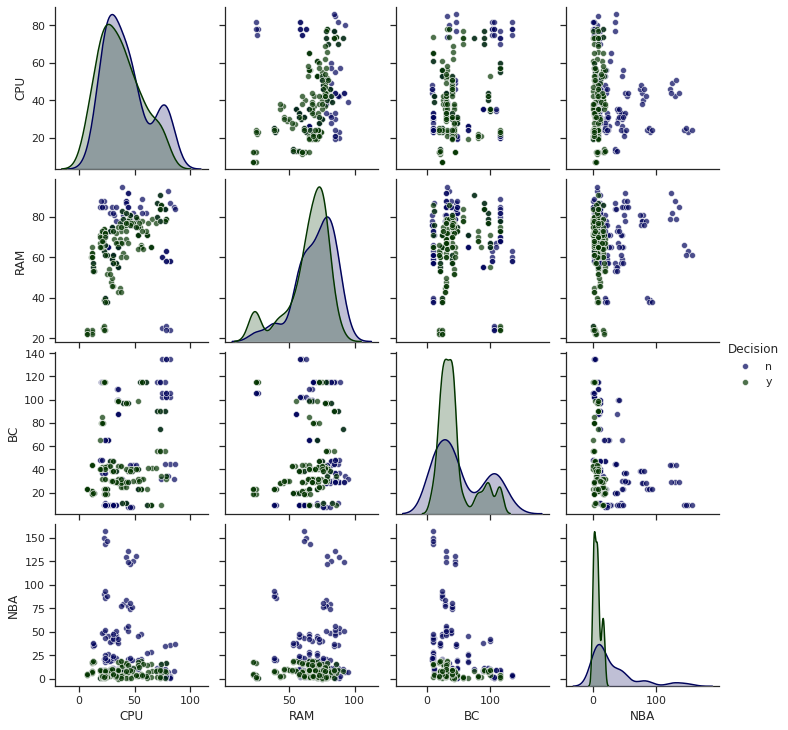

In [7]:

# Use seaborn for pair plots
import seaborn as sns
sns.set(style="ticks", color_codes=True);
# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green'])
# Make the pair plot with a some aesthetic changes
sns.pairplot(data2, hue = 'Decision', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True))


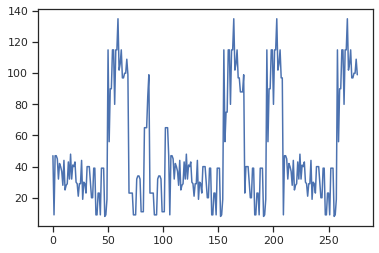

In [8]:
import matplotlib.pyplot as plt
plt.plot(data2['BC']) # Plot list. x-values assumed to be [0, 1, 2, 3]
plt.show()

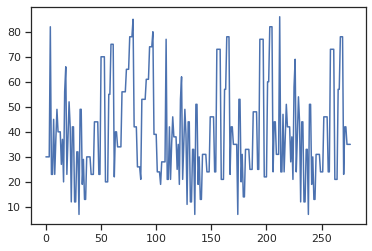

In [9]:
import matplotlib.pyplot as plt
plt.plot(data2['CPU']) # Plot list. x-values assumed to be [0, 1, 2, 3]
plt.show()

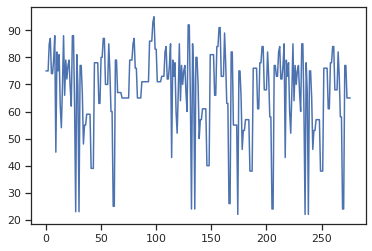

In [10]:
import matplotlib.pyplot as plt
plt.plot(data2['RAM']) # Plot list. x-values assumed to be [0, 1, 2, 3]
plt.show()

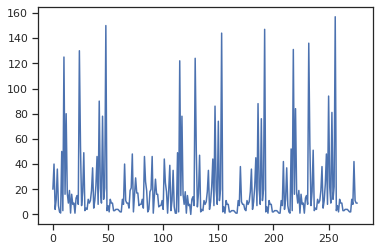

In [11]:
import matplotlib.pyplot as plt
plt.plot(data2['NBA']) # Plot list. x-values assumed to be [0, 1, 2, 3]
plt.show()

In [0]:
t1 = []
t2 = []
for i in range(len(y)):
    if(y[i]=="y"):
        y[i] = 1
        t1.append(y[i])
    else :
        y[i] = 0
        t2.append(y[i])
y=y.astype('int')
t1 = np.array(t1)
t2 = np.array(t2)

In [13]:
y

0      0
1      0
2      1
3      0
4      0
      ..
272    1
273    0
274    0
275    0
276    1
Name: Decision, Length: 277, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [0]:
y_train = np.array(y_train)

In [0]:
y_test = np.array(y_test)


# **Random Forest Classifier**


In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 1000)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_forest=(rfc.predict(x_test))


In [19]:
y_pred_t = rfc.predict(x_train)
from sklearn.metrics import accuracy_score
acc =  accuracy_score(y_train, y_pred_t)
print(acc)


1.0


In [20]:
from sklearn.metrics import accuracy_score
acc =  accuracy_score(y_test, y_pred_forest)
print(acc)


0.9107142857142857


In [21]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_forest, average='binary')
print(f1)

0.9152542372881356


In [22]:
arr = [50,56,1,25]
randx = np.array(arr).reshape(-1,1)
rfc.predict([arr])

array([0])

**SVM MODEL**

In [0]:
from sklearn import svm

#Create a svm Classifier
model_svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model_svm.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svm = model_svm.predict(x_test)

In [24]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.7321428571428571


In [25]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_svm, average='binary')
print(f1)

0.7619047619047619


In [26]:
arr = [50,56,1,25]
randx = np.array(arr).reshape(-1,1)
model_svm.predict([arr])

array([1])

# **Naive Bayes**


In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(x_train, y_train).predict(x_test)


In [28]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gnb))

Accuracy: 0.8214285714285714


In [29]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_gnb, average='binary')
print(f1)

0.8571428571428572


In [30]:
arr = [50,56,1,25]
randx = np.array(arr).reshape(-1,1)
gnb.predict([arr])

array([0])

# **KNN**

Text(0, 0.5, 'Testing accuracy')

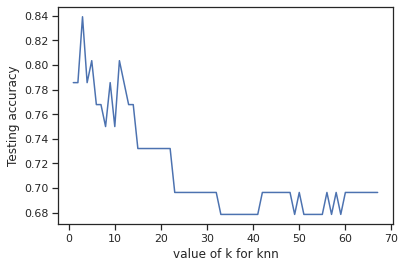

In [31]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,68)
scores={}
scores_list = []
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  scores[k]=metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel("value of k for knn")
plt.ylabel("Testing accuracy")

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
y_pred_knn = knn.fit(x_train, y_train).predict(x_test)


In [43]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

Accuracy: 0.8035714285714286


In [34]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_knn, average='binary')
print(f1)

0.7540983606557377


In [35]:
arr = [50,56,1,25]
randx = np.array(arr).reshape(-1,1)
knn.predict([arr])

array([0])